In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import pandas_profiling as pp

In [4]:
#Read the data set
b = pd.read_csv('bank-full.csv')
b

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# dropping the columns as it is not required
e= b.drop(['job','marital','education','contact','day','month','campaign','pdays','previous','poutcome'],axis=1)
e

,age,default,balance,housing,loan,duration,y
0,58,no,2143,yes,no,261,no
1,44,no,29,yes,no,151,no
2,33,no,2,yes,yes,76,no
3,47,no,1506,yes,no,92,no
4,33,no,1,no,no,198,no
...,...,...,...,...,...,...,...
45206,51,no,825,no,no,977,yes
45207,71,no,1729,no,no,456,yes
45208,72,no,5715,no,no,1127,yes
45209,57,no,668,no,no,508,no


In [6]:
#Converting the categorical data to Binary data
e['default'] = e['default'].astype('category').cat.codes
e['housing'] = e['housing'].astype('category').cat.codes
e['loan'] = e['loan'].astype('category').cat.codes
e['y'] = e['y'].astype('category').cat.codes
e

,age,default,balance,housing,loan,duration,y
0,58,0,2143,1,0,261,0
1,44,0,29,1,0,151,0
2,33,0,2,1,1,76,0
3,47,0,1506,1,0,92,0
4,33,0,1,0,0,198,0
...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,1
45207,71,0,1729,0,0,456,1
45208,72,0,5715,0,0,1127,1
45209,57,0,668,0,0,508,0


In [7]:
#To find whether there are any existing null values or not
e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   default   45211 non-null  int8 
 2   balance   45211 non-null  int64
 3   housing   45211 non-null  int8 
 4   loan      45211 non-null  int8 
 5   duration  45211 non-null  int64
 6   y         45211 non-null  int8 
dtypes: int64(3), int8(4)
memory usage: 1.2 MB


In [8]:
e.isnull().sum()

age         0
default     0
balance     0
housing     0
loan        0
duration    0
y           0
dtype: int64

In [9]:
# Dividing our data into input and output variables 
X = e.iloc[:,0:6]
Y = e.iloc[:,6]

In [10]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [11]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred_proba = classifier.predict_proba(X)
y_pred_proba

array([[0.97570677, 0.02429323],
       [0.97319991, 0.02680009],
       [0.97990801, 0.02009199],
       ...,
       [0.37383147, 0.62616853],
       [0.76951478, 0.23048522],
       [0.71110655, 0.28889345]])

In [12]:
y_pred_df= pd.DataFrame({'actual': Y,'predicted':y_pred,'prob[0]':y_pred_proba[:,0],'prob[1]':y_pred_proba[:,1]})
y_pred_df

,actual,predicted,prob[0],prob[1]
0,0,0,0.975707,0.024293
1,0,0,0.973200,0.026800
2,0,0,0.979908,0.020092
3,0,0,0.979774,0.020226
4,0,0,0.800705,0.199295
...,...,...,...,...
45206,1,1,0.336401,0.663599
45207,1,0,0.870042,0.129958
45208,1,1,0.373831,0.626169
45209,0,0,0.769515,0.230485


In [13]:
pd.crosstab(y_pred_df.actual,y_pred_df.predicted)

predicted,0,1
actual,,
0,39186,736
1,4355,934


In [14]:
max(e.y.value_counts())/len(e.y)

0.8830151954170445

In [15]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_pred_df.actual,y_pred_df.predicted)
accuracy = accuracy_score(y_pred_df.actual,y_pred_df.predicted)
print (cm,accuracy)

[[39186   736]
 [ 4355   934]] 0.887394660591449


In [16]:
y_pred_df.predicted.value_counts()

0    43541
1     1670
Name: predicted, dtype: int64

In [17]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_pred_df.actual,y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.18      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])

df_new=pd.DataFrame({"fpr":fpr,"tpr":tpr,"cutoff":thresholds})

Text(0, 0.5, 'True Positive Rate')

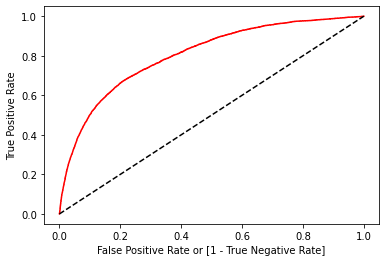

In [19]:
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [20]:
auc

0.5790784893086423

In [21]:
y_pred_new = classifier.predict(X)
prob = classifier.predict_proba(X)
prob = prob[:,1]

new_pred = pd.DataFrame({"actual":Y,"pred":y_pred_new})
new_pred
new_pred.loc[prob>0.5,"pred"]=1
new_pred

,actual,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [22]:
cm_new = confusion_matrix(new_pred.actual,new_pred.pred)

print(cm_new)
print(classification_report(new_pred.actual,new_pred.pred))

[[39186   736]
 [ 4355   934]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.18      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211

